# 1) Resumo

Neste notebook iremos fazer um seleção mais fina das variaveis explicativas. O método aqui utilizado será através da matriz de correlação. As colunas com o módulo da correlação maiores que **0.9** serão excluidas, deixando apenas uma coluna dessa variaveis altamente correlacionadas. A seleção de qual coluna ira ficar é a ordem de comparação apenas. Os coeficientes de correlação foram calculados usando o método padrão de **Pearson**. 

---
# 2) Pre-analise

## 2.1) Importando libs

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 50)

## 2.2) Minhas Funções

In [2]:
import sys
sys.path.insert(1, "../../")
from src.info import dimensao_dados, variaveis_explicativas, mostra_todas_as_colunas_com,escreve_somente_as_colunas
from src.plota_graficos import plota_matriz_correlacao
from src.selecao_vars import remove_coor_valor_de_corte

---
# 3) Selecionando os dados

## 3.1) Importando os dados

In [3]:
path = "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/Dados/Tratados/dados_tratados_por_paciente.csv"

dados = pd.read_csv(path)
dados.head(n=5)

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,ICU
0,1,0.111111,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,1
1,0,-1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.714286,0.604396,0.959596,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,1
2,0,-0.333333,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,0
3,0,-1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.571429,0.538462,0.939394,-0.076923,-0.351351,-0.044776,-0.575758,0.072464,0.894737,0
4,0,-1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.428571,0.252747,0.919192,-0.247863,-0.567568,-0.626866,-0.575758,-0.333333,0.842105,0


## 3.2) Analizando os dados

### Dimensação da matriz atual

In [4]:
dimensao_dados(dados)

Numero de linhas : 351 
Numero de colunas: 181 


### Possiveis variaveis explicativas da base de dados

In [5]:
_ = variaveis_explicativas(dados)

 col[  0] -> AGE_ABOVE65                    col[  1] -> AGE_PERCENTIL                  
 col[  2] -> GENDER                         col[  3] -> DISEASE GROUPING 1             
 col[  4] -> DISEASE GROUPING 2             col[  5] -> DISEASE GROUPING 3             
 col[  6] -> DISEASE GROUPING 4             col[  7] -> DISEASE GROUPING 5             
 col[  8] -> DISEASE GROUPING 6             col[  9] -> HTN                            
 col[ 10] -> IMMUNOCOMPROMISED              col[ 11] -> OTHER                          
 col[ 12] -> ALBUMIN_MEDIAN                 col[ 13] -> ALBUMIN_MEAN                   
 col[ 14] -> ALBUMIN_MIN                    col[ 15] -> ALBUMIN_MAX                    
 col[ 16] -> BE_ARTERIAL_MEDIAN             col[ 17] -> BE_ARTERIAL_MEAN               
 col[ 18] -> BE_ARTERIAL_MIN                col[ 19] -> BE_ARTERIAL_MAX                
 col[ 20] -> BE_VENOUS_MEDIAN               col[ 21] -> BE_VENOUS_MEAN                 
 col[ 22] -> BE_VENOUS_MIN      

## 3.3)  Matriz de Correlação

In [6]:
matriz_coor = dados.iloc[:,:-1].corr().abs()
matriz_coor.head(n=10)

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX
AGE_ABOVE65,1.000000,0.874687,0.029841,0.286508,0.050972,0.165299,0.032275,0.313978,0.009293,0.335941,...,0.218471,0.101605,0.125164,0.109523,0.138601,0.216479,0.182945,0.100797,0.099807,0.133712
AGE_PERCENTIL,0.874687,1.000000,0.053109,0.302582,0.057553,0.133116,0.013922,0.334422,0.045804,0.328727,...,0.189960,0.182369,0.105239,0.116546,0.123914,0.256334,0.164021,0.177867,0.082301,0.139455
GENDER,0.029841,0.053109,1.000000,0.028176,0.002127,0.065530,0.070150,0.020690,0.031159,0.019801,...,0.001729,0.083025,0.113483,0.096524,0.078331,0.076026,0.020213,0.108145,0.127073,0.103040
DISEASE GROUPING 1,0.286508,0.302582,0.028176,1.000000,0.192547,0.271899,0.015883,0.332639,0.187614,0.496748,...,0.000211,0.108349,0.067625,0.016509,0.127739,0.081692,0.065681,0.100761,0.043140,0.006411
DISEASE GROUPING 2,0.050972,0.057553,0.002127,0.192547,1.000000,0.084270,0.114763,0.112739,0.033376,0.116600,...,0.019145,0.014096,0.006094,0.053565,0.071280,0.040882,0.019681,0.023101,0.014457,0.005424
DISEASE GROUPING 3,0.165299,0.133116,0.065530,0.271899,0.084270,1.000000,0.308800,0.293017,0.262946,0.465959,...,0.047635,0.072392,0.089560,0.107068,0.028368,0.145202,0.055304,0.038399,0.090884,0.109951
DISEASE GROUPING 4,0.032275,0.013922,0.070150,0.015883,0.114763,0.308800,1.000000,0.128163,0.164226,0.134550,...,0.028768,0.000307,0.045939,0.033766,0.032511,0.041707,0.043349,0.000082,0.038582,0.010396
DISEASE GROUPING 5,0.313978,0.334422,0.020690,0.332639,0.112739,0.293017,0.128163,1.000000,0.120473,0.453608,...,0.074816,0.156508,0.012535,0.081379,0.035633,0.108260,0.079656,0.093611,0.068813,0.001611
DISEASE GROUPING 6,0.009293,0.045804,0.031159,0.187614,0.033376,0.262946,0.164226,0.120473,1.000000,0.201224,...,0.018276,0.028672,0.066151,0.026726,0.007606,0.022002,0.001392,0.013048,0.012284,0.019606
HTN,0.335941,0.328727,0.019801,0.496748,0.116600,0.465959,0.134550,0.453608,0.201224,1.000000,...,0.109397,0.102396,0.147156,0.032649,0.007788,0.200885,0.019377,0.129353,0.084762,0.014293


### Matriz de correlação com correlações sem tratamento

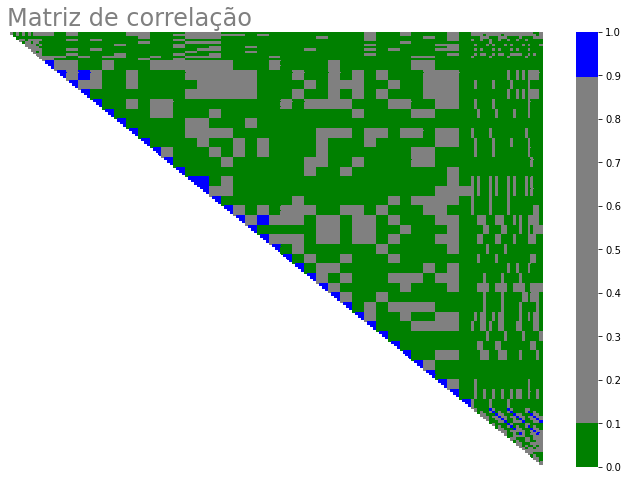

In [7]:
plota_matriz_correlacao(dados, matriz='upper')

> Retirando as colunas com os valore de correlação maiores que **0.9** (metodo de pearson). A cor **azul** são valores entre **[0.9 e 1.0]**. A cor **cinza** são valores entre **[0.1 e 0.8]**. A cor verde são valores entre **[0 e 0.1]**.

In [8]:
dados_sem_coor_acima_do_valor_de_corte, colunas_exluidas = remove_coor_valor_de_corte(dados, 0.90)
print(f'{len(colunas_exluidas)} a coluna exluidas foram')

128 a coluna exluidas foram


In [11]:
colunas_exluidas

['ALBUMIN_MEAN',
 'ALBUMIN_MIN',
 'ALBUMIN_MAX',
 'BE_ARTERIAL_MEAN',
 'BE_ARTERIAL_MIN',
 'BE_ARTERIAL_MAX',
 'BE_VENOUS_MEAN',
 'BE_VENOUS_MIN',
 'BE_VENOUS_MAX',
 'BIC_ARTERIAL_MEDIAN',
 'BIC_ARTERIAL_MEAN',
 'BIC_ARTERIAL_MIN',
 'BIC_ARTERIAL_MAX',
 'BIC_VENOUS_MEAN',
 'BIC_VENOUS_MIN',
 'BIC_VENOUS_MAX',
 'BILLIRUBIN_MEAN',
 'BILLIRUBIN_MIN',
 'BILLIRUBIN_MAX',
 'BLAST_MEAN',
 'BLAST_MIN',
 'BLAST_MAX',
 'CALCIUM_MEAN',
 'CALCIUM_MIN',
 'CALCIUM_MAX',
 'CREATININ_MEAN',
 'CREATININ_MIN',
 'CREATININ_MAX',
 'FFA_MEAN',
 'FFA_MIN',
 'FFA_MAX',
 'GGT_MEAN',
 'GGT_MIN',
 'GGT_MAX',
 'GLUCOSE_MEAN',
 'GLUCOSE_MIN',
 'GLUCOSE_MAX',
 'HEMATOCRITE_MEAN',
 'HEMATOCRITE_MIN',
 'HEMATOCRITE_MAX',
 'HEMOGLOBIN_MEDIAN',
 'HEMOGLOBIN_MEAN',
 'HEMOGLOBIN_MIN',
 'HEMOGLOBIN_MAX',
 'INR_MEAN',
 'INR_MIN',
 'INR_MAX',
 'LACTATE_MEAN',
 'LACTATE_MIN',
 'LACTATE_MAX',
 'LEUKOCYTES_MEAN',
 'LEUKOCYTES_MIN',
 'LEUKOCYTES_MAX',
 'LINFOCITOS_MEAN',
 'LINFOCITOS_MIN',
 'LINFOCITOS_MAX',
 'NEUTROPHILES_MED

In [9]:
dados_sem_coor_acima_do_valor_de_corte.head(n=10)

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MAX,ICU
0,1,0.111111,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-0.836145,-0.994912,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,-0.247863,1
1,0,-1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.836145,-0.978029,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.435897,1
2,0,-0.333333,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.937349,-0.978029,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,-0.299145,0
3,0,-1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.903614,-1.000000,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,-0.076923,0
4,0,-1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.884337,-1.000000,-0.037037,-0.538462,-0.537736,-0.525424,-0.196429,0.815789,-0.247863,0
5,1,0.333333,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.951807,-0.978029,-0.209877,-0.446154,-0.415094,-0.593220,0.178571,0.894737,-0.452991,0
6,0,-0.777778,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.865060,-0.974174,0.185185,-0.276923,-0.584906,-0.389831,-0.285714,0.842105,-0.179487,0
7,0,-0.111111,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.874699,-0.978029,-0.185185,-0.630769,-0.320755,-0.593220,0.464286,0.789474,-0.435897,0
8,1,0.555556,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.869880,-0.978029,0.086420,-0.076923,-0.320755,-0.661017,-0.321429,0.842105,-0.247863,0
9,1,0.555556,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.744578,-0.971322,0.259259,-0.292308,-0.754717,-0.661017,0.107143,0.789474,-0.128205,0


### Matriz de correlação com correlações menores que 0.9

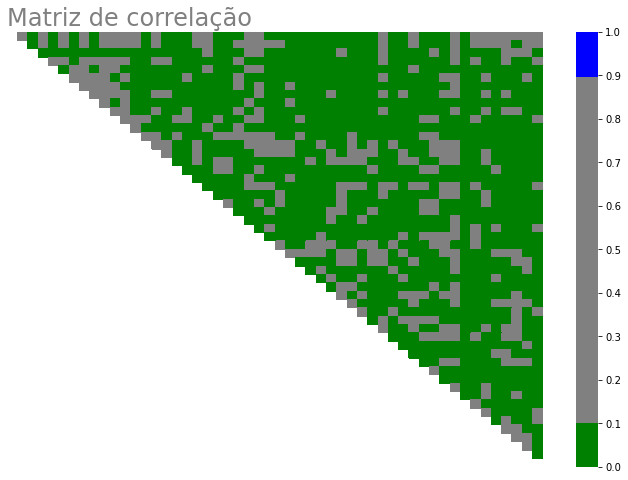

In [10]:
plota_matriz_correlacao(dados_sem_coor_acima_do_valor_de_corte, matriz='upper')

> Agora pode-se oberserva que as correlações entre as variaveis são sem abaixo de 0.9.

In [30]:
dimensao_dados(dados_sem_coor_acima_do_valor_de_corte)

Numero de linhas : 351 
Numero de colunas: 53 


### lista das variaveis explicativa com baixa correlação

In [ ]:
_ = variaveis_explicativas(dados_sem_coor_acima_do_valor_de_corte)

> Os dados fincais tem **53** variaveis explicativas selecionadas

# 4) Salvando os dados

In [37]:
path_out = '../../Dados/Tratados/'
dados_sem_coor_acima_do_valor_de_corte.to_csv(path_out+'dados_sem_coor_acima_do_valor_de_corte.csv'
                                              , index_label=False)

In [38]:
escreve_somente_as_colunas(dados_sem_coor_acima_do_valor_de_corte
                           ,path_out+'dados_sem_coor_acima_do_valor_de_corte_colunas.csv')

---
Navegação:

[Exploração e limpeza de dados](https://github.com/HenriqueCCdA/BC_DS_Projeto_Final/blob/main/Notebooks/Exploratorios/explaracao_limpezada.ipynb)

[Retornar para README principal](https://github.com/HenriqueCCdA/BC_DS_Projeto_Final)

---